In [ ]:
!pip install pyhealth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.3/226.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 72.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=3b94e3c82854076768bae37090aef4fa2077ff3435c387ea08ddded34d5cc45a
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


### **Step 1: Load dataset**
- **[README]:** We call [pyhealth.datasets](https://pyhealth.readthedocs.io/en/latest/api/datasets.html) to process and obtain the dataset.
  - `root` is the arguments directing to the data folder.
  - `tables` is a list of table names from raw databases, which specifies the information that will be used in building the pipeline. Currently, we support [MIMIC3Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html), [MIMIC4Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC4Dataset.html), [eICUDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.eICUDataset.html), [OMOPDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.OMOPDataset.html).
  - `code_mapping [default: None]` asks a directionary input, specifying the new coding systems for each data table. For example, `{"NDC": ("ATC", {"target_kwargs": {"level": 3}})}` means that our pyhealth will automatically change the codings from `NDC` into ATC-3 level for tables if any.
  - `dev`: if set `True`, will only load a smaller set of patients.
- **[Next Step]:** This `pyhealth.datasets` object will be used in **Step 2**.

In [ ]:
from pyhealth.datasets import MIMIC3Dataset

mimic3_ds = MIMIC3Dataset(
        root="https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/",
        tables=["DIAGNOSES_ICD", "PROCEDURES_ICD", "PRESCRIPTIONS"],
        code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})},
        dev=True
)

mimic3_ds.stat()

Mapping codes: 100%|██████████| 1000/1000 [00:01<00:00, 725.47it/s]



Statistics of base dataset (dev=True):
	- Dataset: MIMIC3Dataset
	- Number of patients: 1000
	- Number of visits: 1054
	- Number of visits per patient: 1.0540
	- Number of events per visit in DIAGNOSES_ICD: 9.2068
	- Number of events per visit in PROCEDURES_ICD: 3.0380
	- Number of events per visit in PRESCRIPTIONS: 40.1869



'\nStatistics of base dataset (dev=True):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 1000\n\t- Number of visits: 1054\n\t- Number of visits per patient: 1.0540\n\t- Number of events per visit in DIAGNOSES_ICD: 9.2068\n\t- Number of events per visit in PROCEDURES_ICD: 3.0380\n\t- Number of events per visit in PRESCRIPTIONS: 40.1869\n'

In [ ]:
# data format
mimic3_ds.info()


dataset.patients: patient_id -> <Patient>

<Patient>
    - visits: visit_id -> <Visit> 
    - other patient-level info
    
    <Visit>
        - event_list_dict: table_name -> List[Event]
        - other visit-level info
    
        <Event>
            - code: str
            - other event-level info



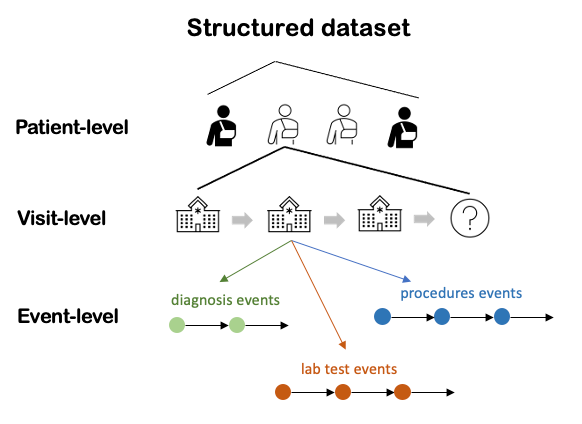

In [ ]:
""" check the information """
# mimic3_ds.patients
# mimic3_ds.patients['947']
# mimic3_ds.patients['947'].visits
# mimic3_ds.patients['947'].visits['100999']
# mimic3_ds.patients['947'].visits['100999'].get_code_list('DIAGNOSES_ICD')

### **Step 2: Define healthcare task**
- **[README]:** This step assigns a **task function** to the dataset for data loading [pyhealth.tasks](https://pyhealth.readthedocs.io/en/latest/api/tasks.html). The **task function** specifics how to process each pateint's data into a set of samples for the downstream machine learning models.
- **[Next Step]:** This `pyhealth.tasks` object will be used in **Step 3**.

In [ ]:
from pyhealth.tasks import drug_recommendation_mimic3_fn

mimic3_ds = mimic3_ds.set_task(task_fn=drug_recommendation_mimic3_fn)
# stats info
mimic3_ds.stat()

Generating samples for drug_recommendation_mimic3_fn: 100%|██████████| 1000/1000 [00:00<00:00, 25013.44it/s]

Statistics of sample dataset:
	- Dataset: MIMIC3Dataset
	- Task: drug_recommendation_mimic3_fn
	- Number of samples: 20
	- Number of patients: 10
	- Number of visits: 20
	- Number of visits per patient: 2.0000
	- conditions:
		- Number of conditions per sample: 19.3000
		- Number of unique conditions: 193
		- Distribution of conditions (Top-10): [('4280', 11), ('4019', 8), ('41401', 8), ('3051', 8), ('2768', 6), ('25000', 6), ('311', 5), ('5849', 5), ('51881', 5), ('5856', 5)]
	- procedures:
		- Number of procedures per sample: 5.7000
		- Number of unique procedures: 51
		- Distribution of procedures (Top-10): [('3893', 14), ('9604', 7), ('8872', 6), ('9671', 5), ('8856', 4), ('4513', 3), ('3615', 3), ('8382', 3), ('370', 2), ('4516', 2)]
	- drugs:
		- Number of drugs per sample: 28.4500
		- Number of unique drugs: 116
		- Distribution of drugs (Top-10): [('B05X', 19), ('A06A', 19), ('B01A', 16), ('V06D', 15), ('N02A', 15), ('N02B', 15), ('V04C', 14), ('C07A', 13), ('A02B', 12), ('R03B

"Statistics of sample dataset:\n\t- Dataset: MIMIC3Dataset\n\t- Task: drug_recommendation_mimic3_fn\n\t- Number of samples: 20\n\t- Number of patients: 10\n\t- Number of visits: 20\n\t- Number of visits per patient: 2.0000\n\t- conditions:\n\t\t- Number of conditions per sample: 19.3000\n\t\t- Number of unique conditions: 193\n\t\t- Distribution of conditions (Top-10): [('4280', 11), ('4019', 8), ('41401', 8), ('3051', 8), ('2768', 6), ('25000', 6), ('311', 5), ('5849', 5), ('51881', 5), ('5856', 5)]\n\t- procedures:\n\t\t- Number of procedures per sample: 5.7000\n\t\t- Number of unique procedures: 51\n\t\t- Distribution of procedures (Top-10): [('3893', 14), ('9604', 7), ('8872', 6), ('9671', 5), ('8856', 4), ('4513', 3), ('3615', 3), ('8382', 3), ('370', 2), ('4516', 2)]\n\t- drugs:\n\t\t- Number of drugs per sample: 28.4500\n\t\t- Number of unique drugs: 116\n\t\t- Distribution of drugs (Top-10): [('B05X', 19), ('A06A', 19), ('B01A', 16), ('V06D', 15), ('N02A', 15), ('N02B', 15), ('

In [ ]:
mimic3_ds.samples[0]

In [ ]:
from pyhealth.datasets.splitter import split_by_patient
from pyhealth.datasets import split_by_patient, get_dataloader

# data split
train_dataset, val_dataset, test_dataset = split_by_patient(mimic3_ds, [0.8, 0.1, 0.1])

# create dataloaders (they are <torch.data.DataLoader> object)
train_loader = get_dataloader(train_dataset, batch_size=64, shuffle=True)
val_loader = get_dataloader(val_dataset, batch_size=64, shuffle=False)
test_loader = get_dataloader(test_dataset, batch_size=64, shuffle=False)

### **Step 3: Define ML Model**
- **[README]:** We initialize an ML model for the healthcare task by calling [pyhealth.models](https://pyhealth.readthedocs.io/en/latest/api/models.html).
- **[Next Step]:** This `pyhealth.models` object will be used in **Step 4**.
- **[Other Use Case]:** Our `pyhealth.models` object is as general as any instance from `torch.nn.Module`. Users may use it separately for supporting any other customized pipeline.

In [ ]:
from pyhealth.models import Transformer

model = Transformer(
    dataset=mimic3_ds,
    feature_keys=["conditions", "procedures"],
    label_key="drugs",
    mode="multilabel",
)


### **Step 4: Model Training**
- **[README]:** We call our [pyhealth.train.Trainer](https://pyhealth.readthedocs.io/en/latest/api/trainer.html) to train the model by giving the `train_loader`, the `val_loader`, val_metric, and specify other arguemnts, such as epochs, optimizer, learning rate, etc. The trainer will automatically save the best model and output the path in the end.
- **[Next Step]:** The best model will be used in **Step 5** for evaluation.


In [ ]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=3,
    monitor="pr_auc_samples",
)

Transformer(
  (embeddings): ModuleDict(
    (conditions): Embedding(195, 128, padding_idx=0)
    (procedures): Embedding(53, 128, padding_idx=0)
  )
  (linear_layers): ModuleDict()
  (transformer): ModuleDict(
    (conditions): TransformerLayer(
      (transformer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadedAttention(
            (linear_layers): ModuleList(
              (0): Linear(in_features=128, out_features=128, bias=False)
              (1): Linear(in_features=128, out_features=128, bias=False)
              (2): Linear(in_features=128, out_features=128, bias=False)
            )
            (output_linear): Linear(in_features=128, out_features=128, bias=False)
            (attention): Attention()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (feed_forward): PositionwiseFeedForward(
            (w_1): Linear(in_features=128, out_features=512, bias=True)
            (w_2): Linear(in_features=512, out_features=128, b

Epoch 0 / 3:   0%|          | 0/1 [00:00<?, ?it/s]

--- Train epoch-0, step-1 ---
loss: 1.0764
Evaluation: 100%|██████████| 1/1 [00:00<00:00, 154.17it/s]
--- Eval epoch-0, step-1 ---
pr_auc_samples: 0.4840
loss: 0.9478
New best pr_auc_samples score (0.4840) at epoch-0, step-1



Epoch 1 / 3:   0%|          | 0/1 [00:00<?, ?it/s]

--- Train epoch-1, step-2 ---
loss: 1.0010
Evaluation: 100%|██████████| 1/1 [00:00<00:00, 72.56it/s]
--- Eval epoch-1, step-2 ---
pr_auc_samples: 0.4832
loss: 0.9429



Epoch 2 / 3:   0%|          | 0/1 [00:00<?, ?it/s]

--- Train epoch-2, step-3 ---
loss: 0.9128
Evaluation: 100%|██████████| 1/1 [00:00<00:00, 153.91it/s]
--- Eval epoch-2, step-3 ---
pr_auc_samples: 0.4855
loss: 0.9340
New best pr_auc_samples score (0.4855) at epoch-2, step-3
Loaded best model


### **Step 5: Evaluation**

In [ ]:
# option 1: use our built-in evaluation metric
score = trainer.evaluate(test_loader)
print (score)

# option 2: use our pyhealth.metrics to evaluate
from pyhealth.metrics.multilabel import multilabel_metrics_fn
y_true, y_prob, loss = trainer.inference(test_loader)
multilabel_metrics_fn(y_true, y_prob, metrics=["pr_auc_samples"])

Evaluation: 100%|██████████| 1/1 [00:00<00:00, 96.16it/s]


{'pr_auc_samples': 0.24748548437566276, 'loss': 0.8778110146522522}


Evaluation: 100%|██████████| 1/1 [00:00<00:00, 77.80it/s]


{'pr_auc_samples': 0.24748548437566276}

If this helps, please give us a star ⭐ (fork, and watch) at https://github.com/sunlabuiuc/PyHealth.

Thanks very much for your support!